In [150]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.graph_objs as gobj
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [5]:
#Read in the csv file and convert to a Pandas dataframe
happines_2015 = pd.read_csv("../Data/2015.csv")

In [7]:
happines_2016 = pd.read_csv("../Data/2016.csv")

In [9]:
happines_2017 = pd.read_csv("../Data/2017.csv")

In [11]:
happines_2018 = pd.read_csv("../Data/2018.csv")

In [13]:
happines_2019 = pd.read_csv("../Data/2019.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [16]:
happines_2015.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [18]:
happines_2016.head()

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596

In [20]:
happines_2017.head()

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715  
3    0.290549                       0.367007           2.276716  
4    0.245483                       0.382612           2.430182

In [22]:
happines_2018.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                      0.408  
3                      0.138  
4                      0.357

In [24]:
happines_2019.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [27]:
happines_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [29]:
happines_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [31]:
happines_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [33]:
happines_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [35]:
happines_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [37]:
#I see that each year data have some diffrent columns 
#Only 2018 and 2019 are having same columns

In [39]:
happines_2015.shape

(158, 12)

In [41]:
happines_2016.shape

(157, 13)

In [43]:
happines_2017.shape

(155, 12)

In [45]:
happines_2018.shape

(156, 9)

In [47]:
happines_2019.shape

(156, 9)

## Show columns name


In [50]:
happines_2015.columns 

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [52]:
happines_2016.columns 

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [54]:
happines_2017.columns 

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [56]:
happines_2018.columns 

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [58]:
happines_2019.columns 

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [63]:
# in the kaggle page mentioned data source which is Gallup World Poll

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [66]:
# yes all years are up to date for the needed years

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [69]:
# yes since the info is same for all sources

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [72]:
happines_2015.head(2)

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201

In [74]:
happines_2016.head(2)

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463

In [76]:
happines_2017.head(2)

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0   Norway               1            7.537      7.594445     7.479556   
1  Denmark               2            7.522      7.581728     7.462272   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707

In [78]:
happines_2018.head(2)

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   

   Perceptions of corruption  
0                      0.393  
1                      0.340

In [80]:
happines_2019.head(2)

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   

   Perceptions of corruption  
0                      0.393  
1                      0.410

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [83]:
happines_2015.duplicated().sum()

0

In [85]:
happines_2016.duplicated().sum()

0

In [87]:
happines_2017.duplicated().sum()

0

In [89]:
happines_2018.duplicated().sum()

0

In [91]:
happines_2019.duplicated().sum()

0

In [93]:
#No duplication hence no removal is needed 

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [96]:
#Display number missing values per column

In [98]:
happines_2015.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [100]:
happines_2016.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [102]:
happines_2017.isna().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [104]:
happines_2018.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [106]:
happines_2018[happines_2018['Perceptions of corruption'].isna()]

Overall rank     Country or region  Score  GDP per capita  Social support  \
19            20  United Arab Emirates  6.774           2.096           0.776   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
19                     0.67                         0.284       0.186   

    Perceptions of corruption  
19                        NaN

In [108]:
happines_2019.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [61]:
#The data has one missing value in year 2018 at Perceptions of corruption columns 
#Since the row has a healpful I will not remove it instead do some imputation in cleaning
#Since there is no clear fourmela to calculate the missing value

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [63]:
happines_2015.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [64]:
happines_2016.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [65]:
happines_2017.dtypes

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

In [66]:
happines_2018.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [67]:
happines_2019.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [68]:
regions  = happines_2015['Region'].value_counts().head(10)
regions

Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

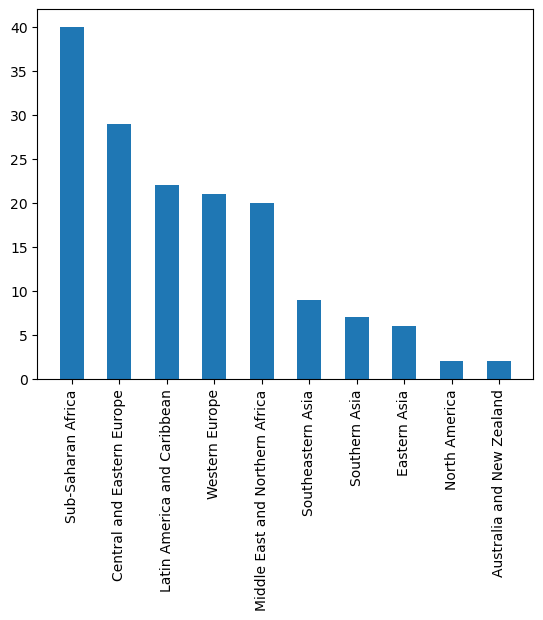

In [69]:
# go to clean them 
plt.bar(regions.index,

        regions.values,
        width=0.5,        
        
       )
plt.xticks(rotation=90)  
plt.show

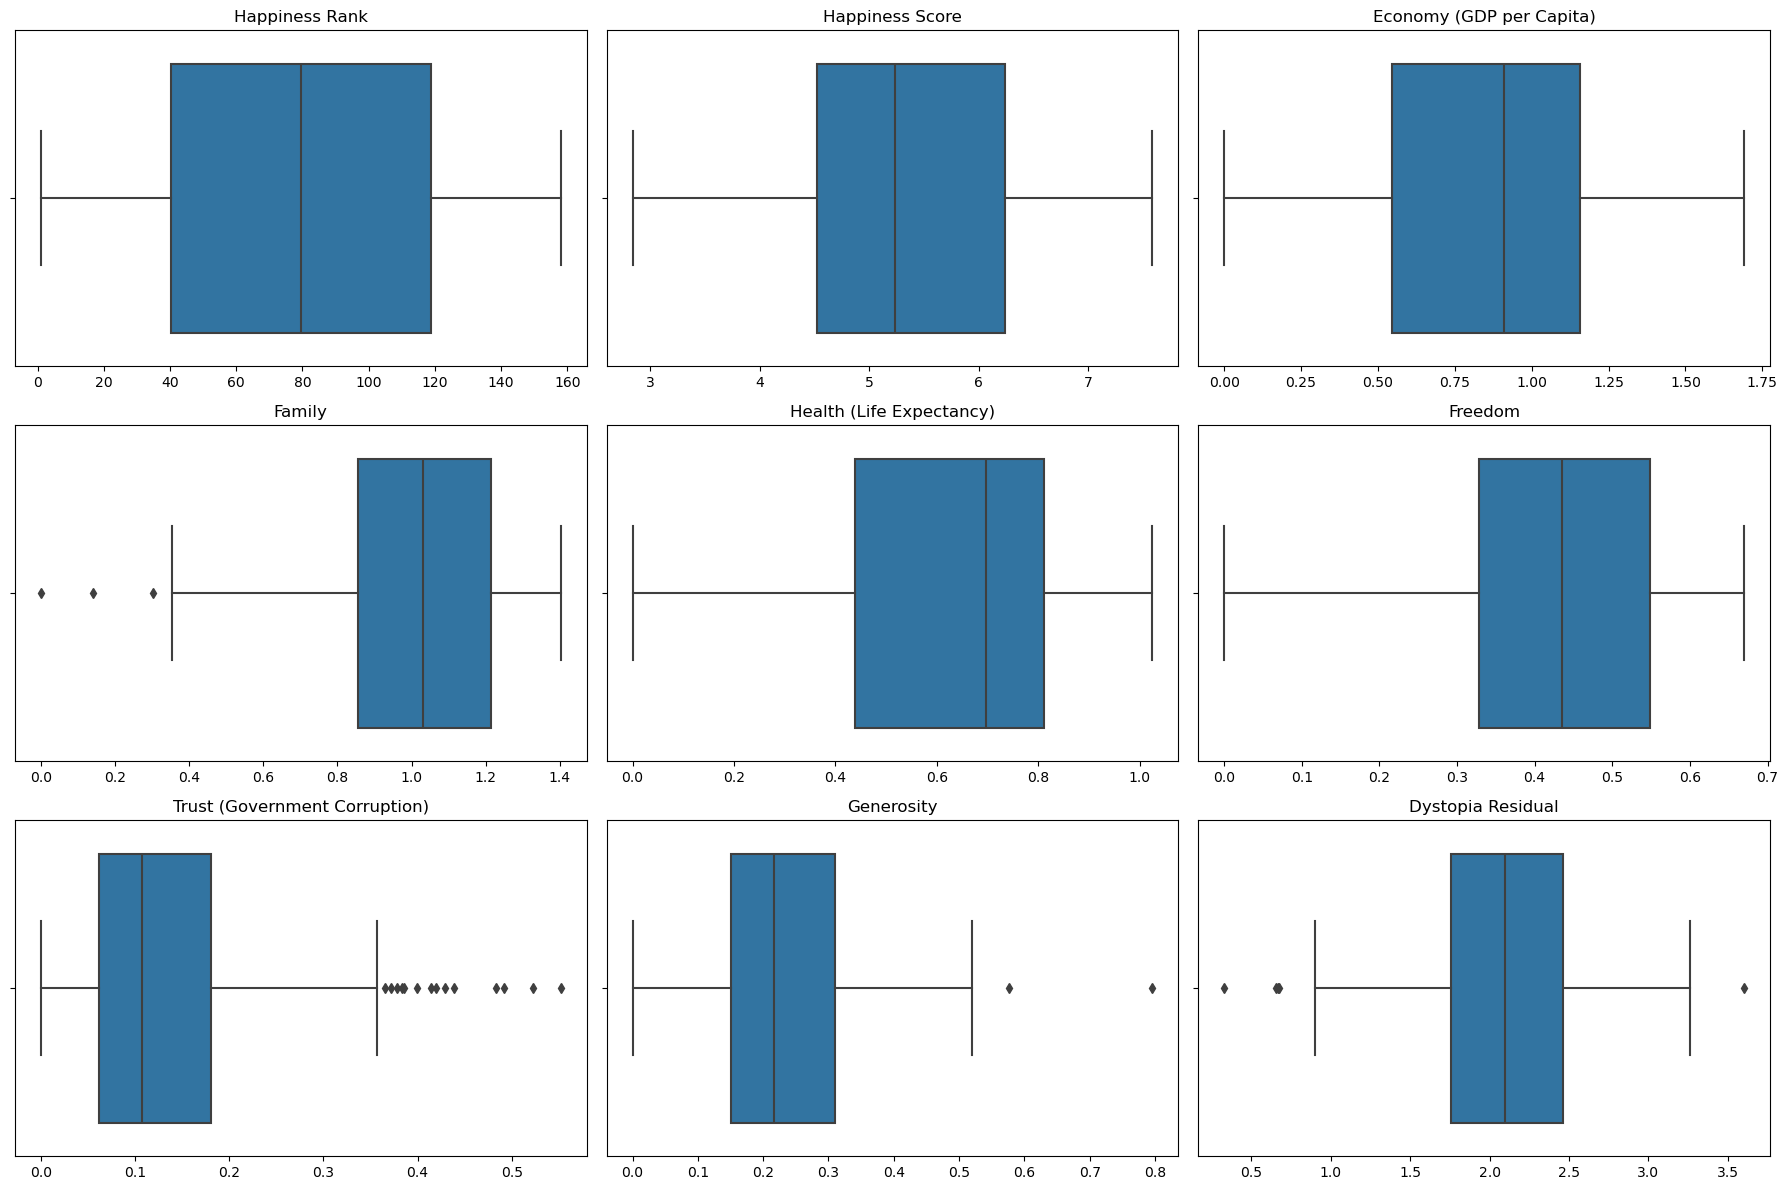

In [110]:
# check outliers 
#2015 data 
columns_to_plot = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

#Flatten the array for faster preformance
axes = axes.flatten()

# Plot each boxplot
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=happines_2015[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

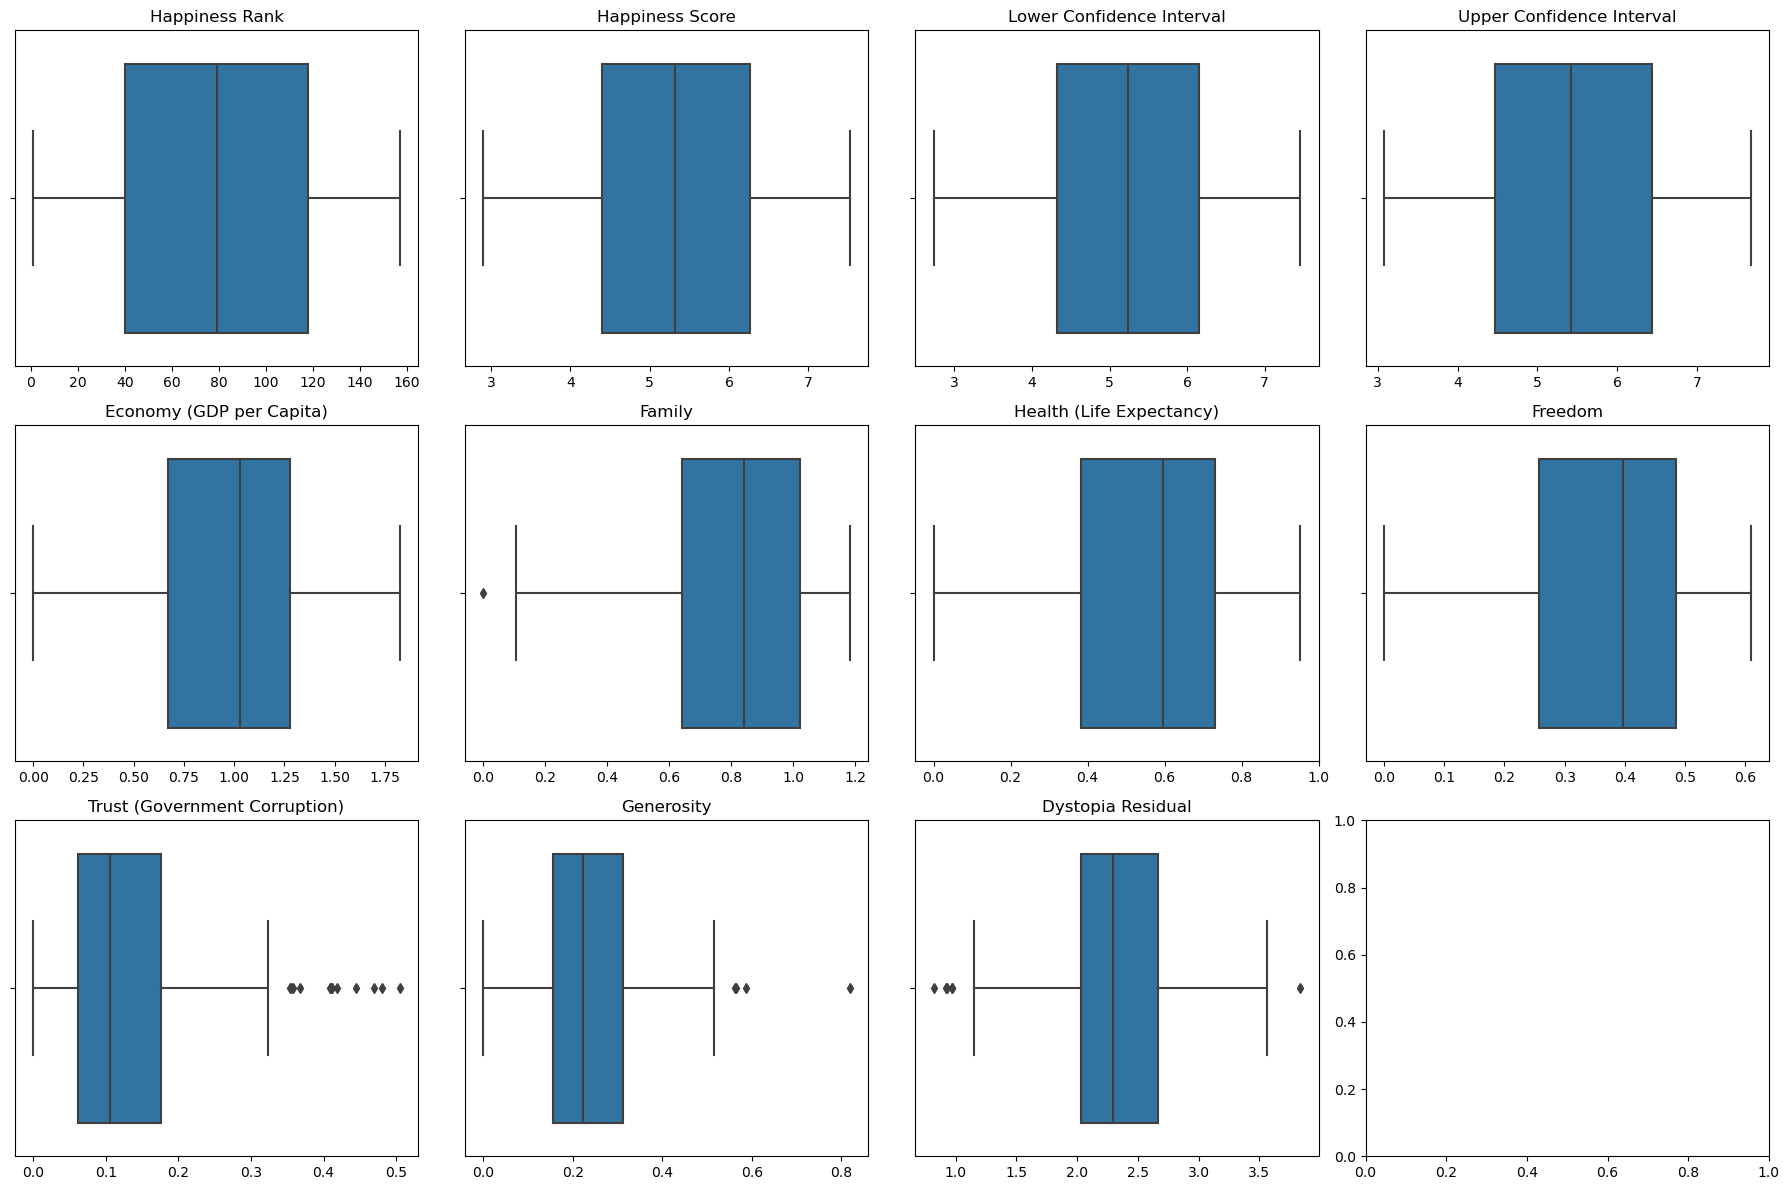

In [116]:
#2016 data
columns_to_plot = ['Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))

#Flatten the array for faster preformance
axes = axes.flatten()

# Plot each boxplot
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=happines_2016[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

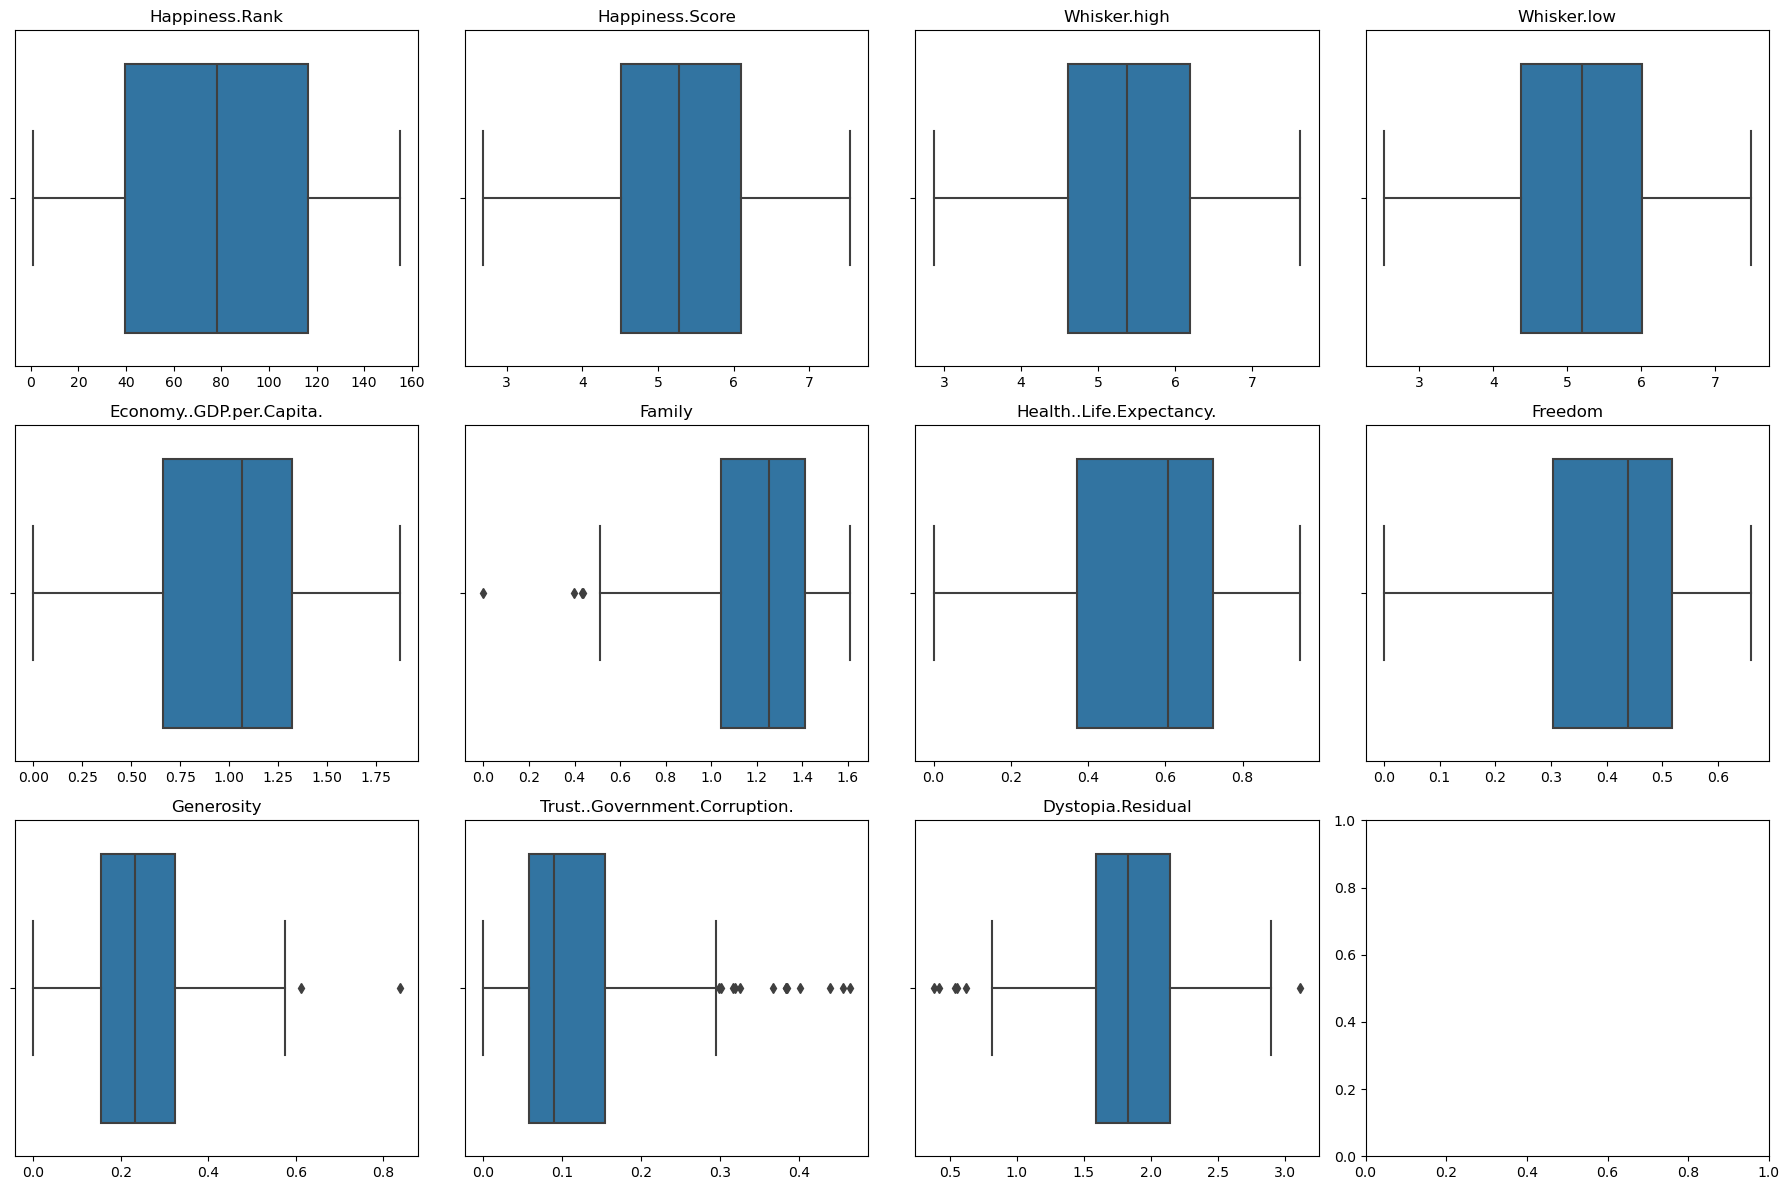

In [120]:
#2017 data
columns_to_plot = ['Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))

#Flatten the array for faster preformance
axes = axes.flatten()

# Plot each boxplot
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=happines_2017[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

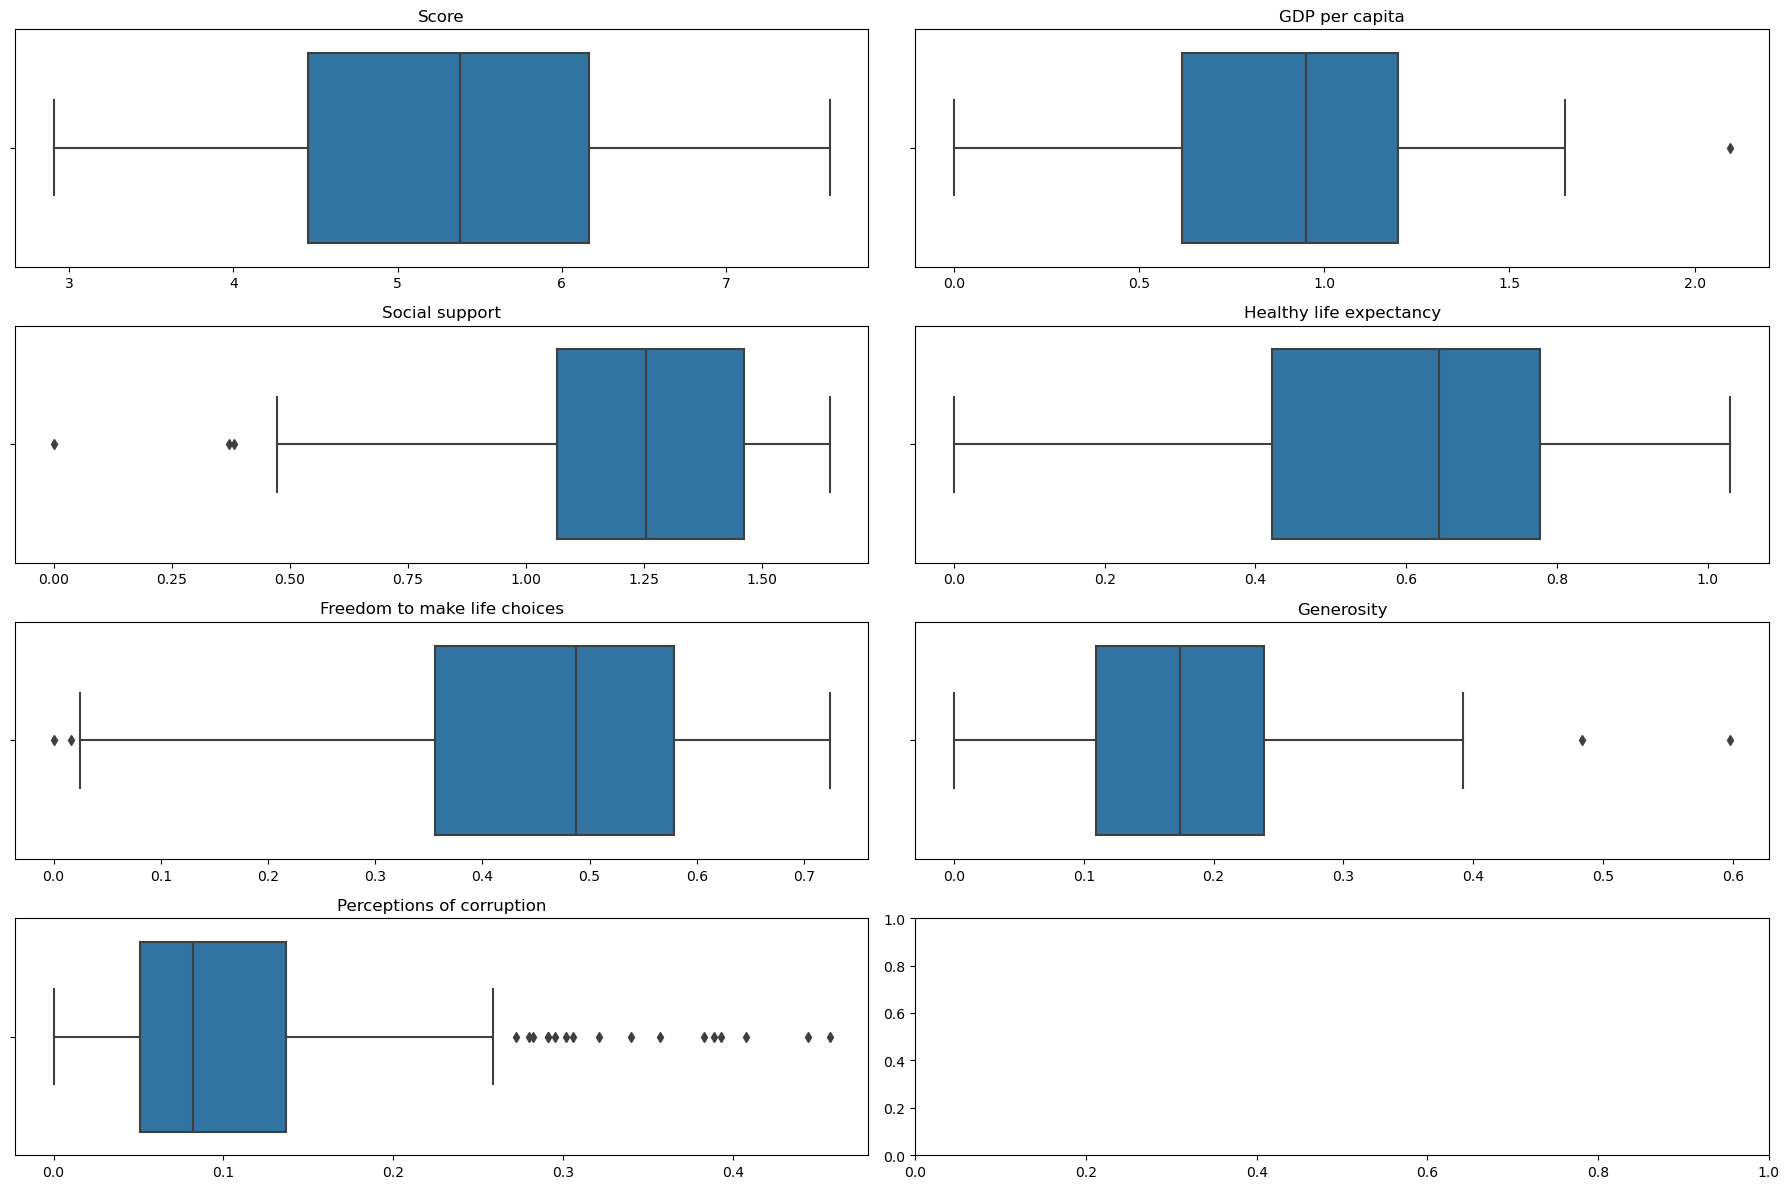

In [126]:
#2018 data
columns_to_plot = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 
                   'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 12))

#Flatten the array for faster preformance
axes = axes.flatten()

# Plot each boxplot
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=happines_2018[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

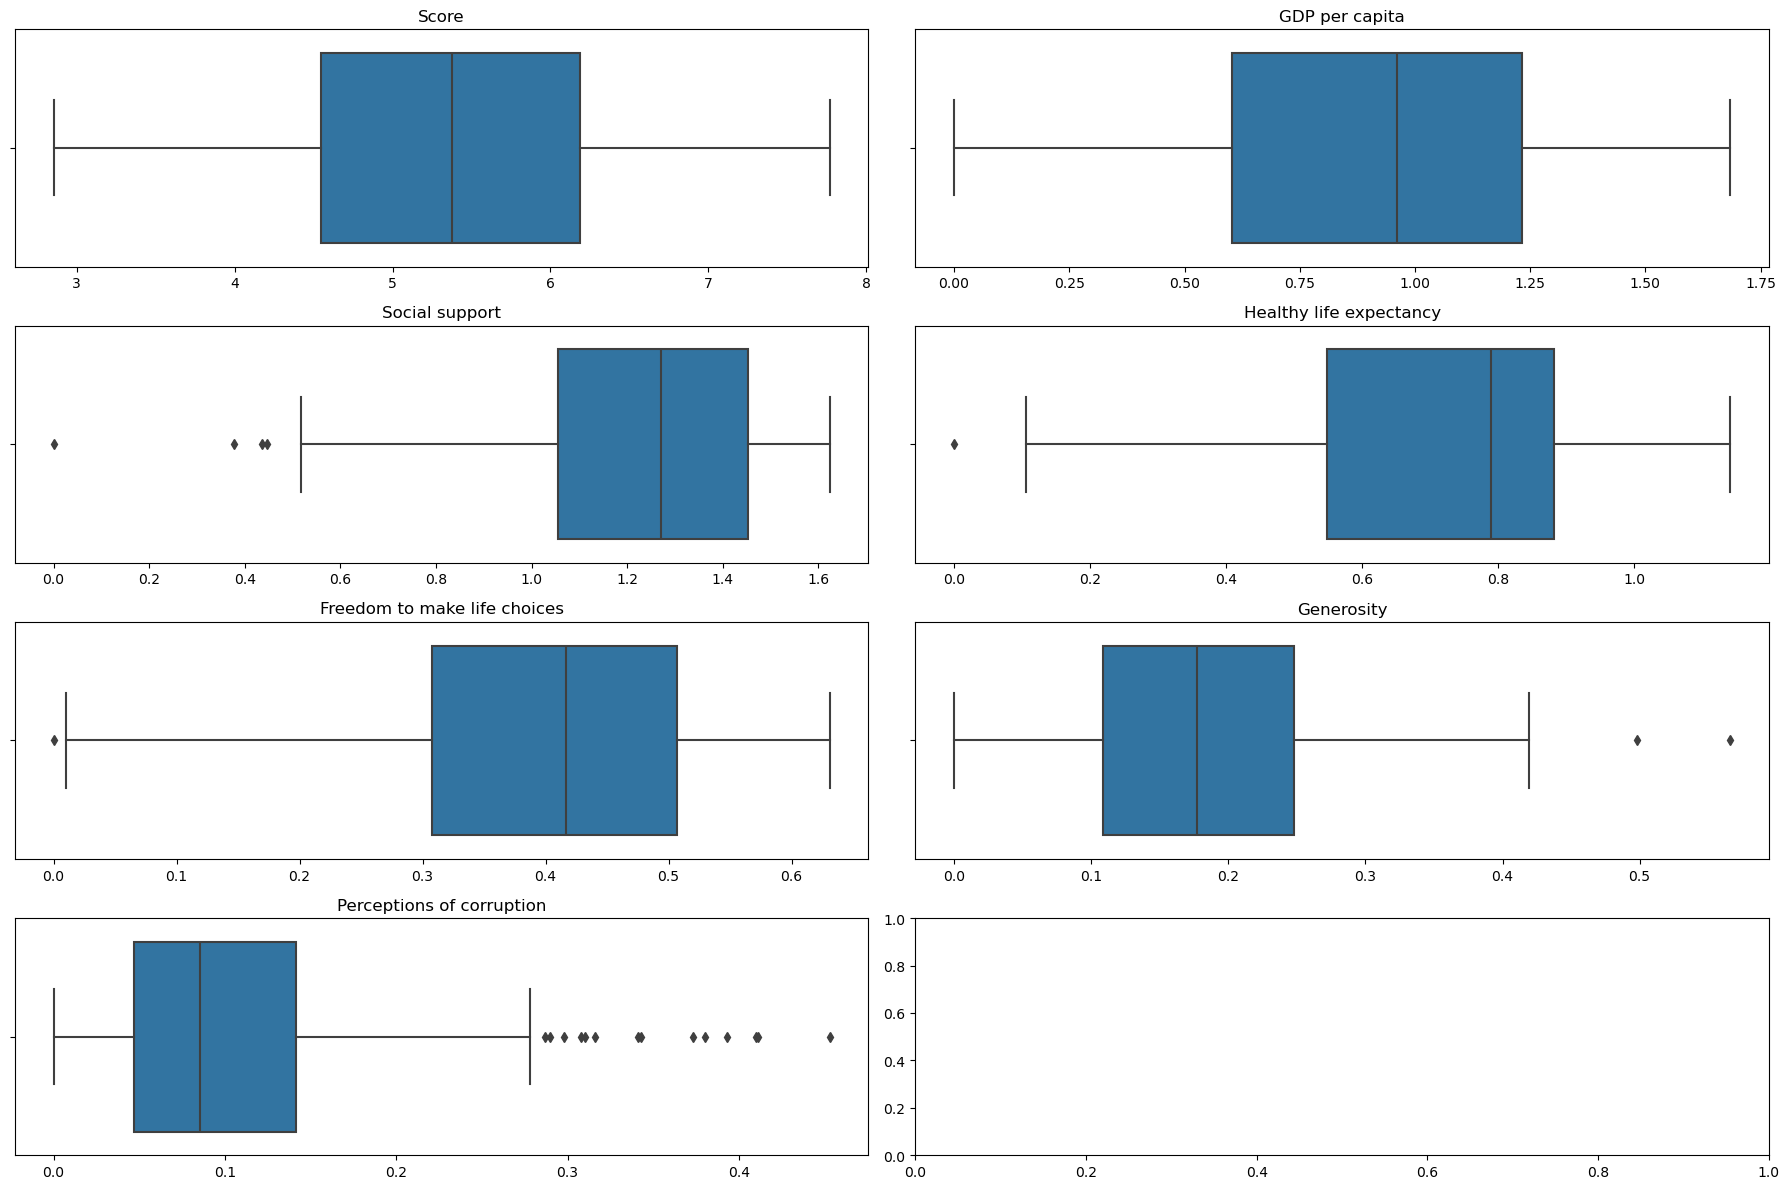

In [132]:
#2019 data
columns_to_plot = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 
                   'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 12))

#Flatten the array for faster preformance
axes = axes.flatten()

# Plot each boxplot
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=happines_2019[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

In [78]:
# go to delete ouliers
# since the outlier is from single columns will treat it as natural outlier

In [82]:
#I did not imputate the nan value since there is no clear fourmela to calculate the missing value

In [83]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [85]:
#no error is there also all dtype is correct

In [86]:
# go back to 7th dimension Accuracy 

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

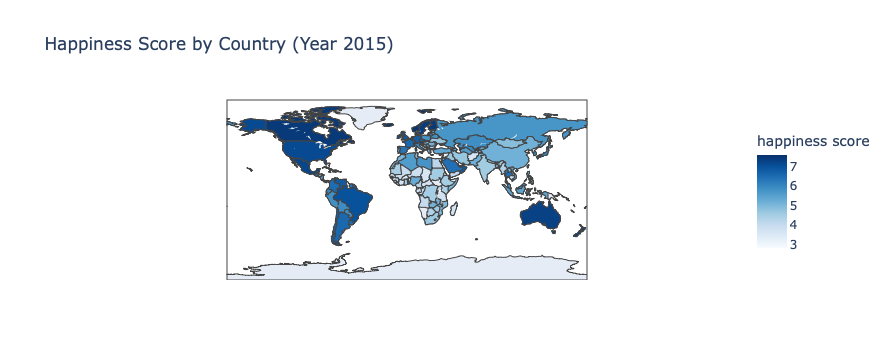

In [152]:
#Initializing the data variable
data = dict(type = 'choropleth',
            locations = happines_2015['Country'],
            locationmode = 'country names',
            autocolorscale = False,
            colorscale = 'Blues',
            text = happines_2015['Country'],
            z = happines_2015['Happiness Score'],
            colorbar = {'title':'happiness score','len':0.75,'lenmode':'fraction'})

#Initializing the object for graph_objs.Figure class
happiness_map = gobj.Figure(data=[data])#,layout=layout)

happiness_map.update_layout(title_text = 'Happiness Score by Country (Year 2015)')

#plotting the map
iplot(happiness_map)

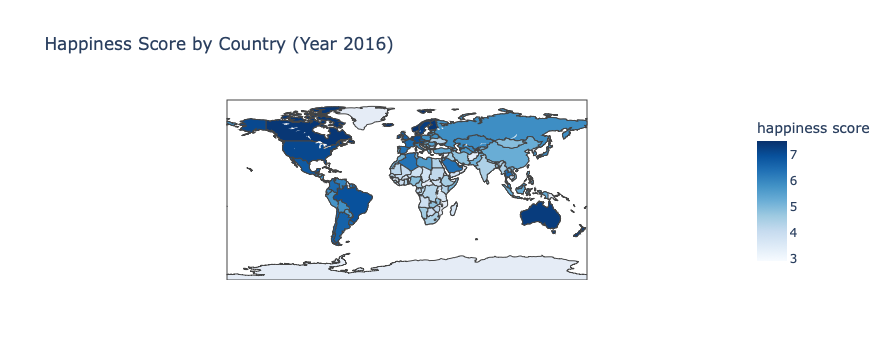

In [226]:
#Initializing the data variable
data = dict(type = 'choropleth',
            locations = happines_2016['Country'],
            locationmode = 'country names',
            autocolorscale = False,
            colorscale = 'Blues',
            text = happines_2016['Country'],
            z = happines_2016['Happiness Score'],
            colorbar = {'title':'happiness score','len':0.9,'lenmode':'fraction'})

#Initializing the object for graph_objs.Figure class
happiness_map = gobj.Figure(data=[data])#,layout=layout)

happiness_map.update_layout(title_text = 'Happiness Score by Country (Year 2016)')

#plotting the map
iplot(happiness_map)

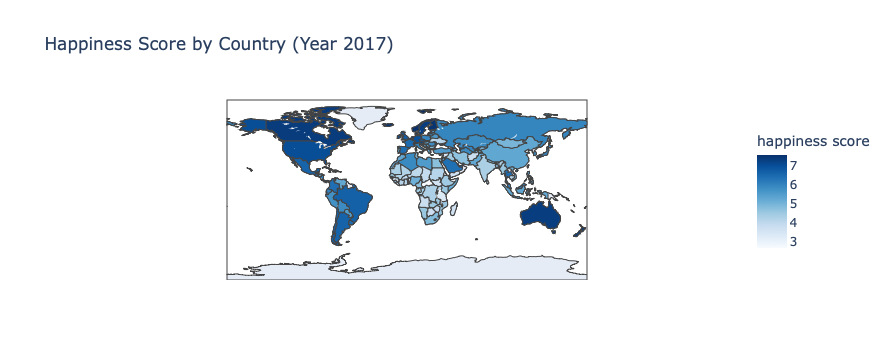

In [160]:
#Initializing the data variable
data = dict(type = 'choropleth',
            locations = happines_2017['Country'],
            locationmode = 'country names',
            autocolorscale = False,
            colorscale = 'Blues',
            text = happines_2017['Country'],
            z = happines_2017['Happiness.Score'],
            colorbar = {'title':'happiness score','len':0.75,'lenmode':'fraction'})

#Initializing the object for graph_objs.Figure class
happiness_map = gobj.Figure(data=[data])#,layout=layout)

happiness_map.update_layout(title_text = 'Happiness Score by Country (Year 2017)')

#plotting the map
iplot(happiness_map)

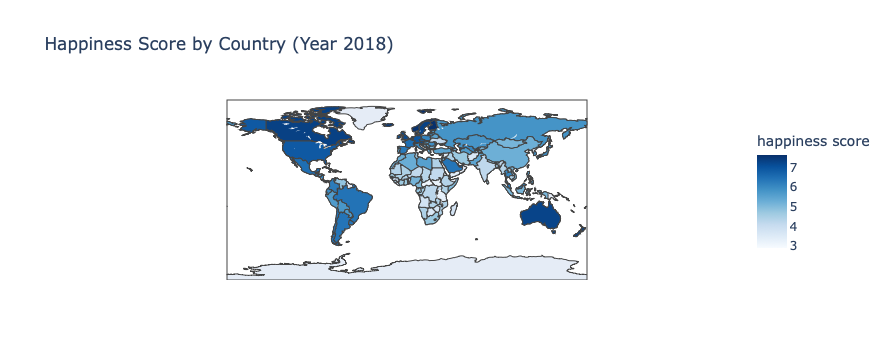

In [166]:
#Initializing the data variable
data = dict(type = 'choropleth',
            locations = happines_2018['Country or region'],
            locationmode = 'country names',
            autocolorscale = False,
            colorscale = 'Blues',
            text = happines_2018['Country or region'],
            z = happines_2018['Score'],
            colorbar = {'title':'happiness score','len':0.75,'lenmode':'fraction'})

#Initializing the object for graph_objs.Figure class
happiness_map = gobj.Figure(data=[data])#,layout=layout)

happiness_map.update_layout(title_text = 'Happiness Score by Country (Year 2018)')

#plotting the map
iplot(happiness_map)

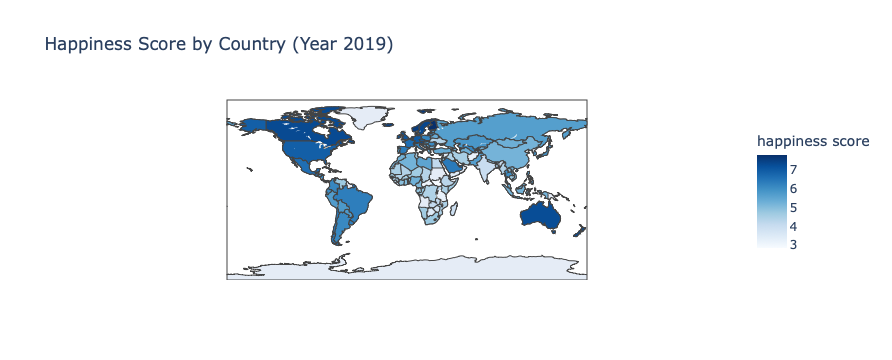

In [170]:
#Initializing the data variable
data = dict(type = 'choropleth',
            locations = happines_2019['Country or region'],
            locationmode = 'country names',
            autocolorscale = False,
            colorscale = 'Blues',
            text = happines_2019['Country or region'],
            z = happines_2019['Score'],
            colorbar = {'title':'happiness score','len':0.75,'lenmode':'fraction'})

#Initializing the object for graph_objs.Figure class
happiness_map = gobj.Figure(data=[data])#,layout=layout)

happiness_map.update_layout(title_text = 'Happiness Score by Country (Year 2019)')

#plotting the map
iplot(happiness_map)

In [212]:
dataframes = [happines_2015, happines_2016, happines_2017, happines_2018, happines_2019]

years = ['2015', '2016']


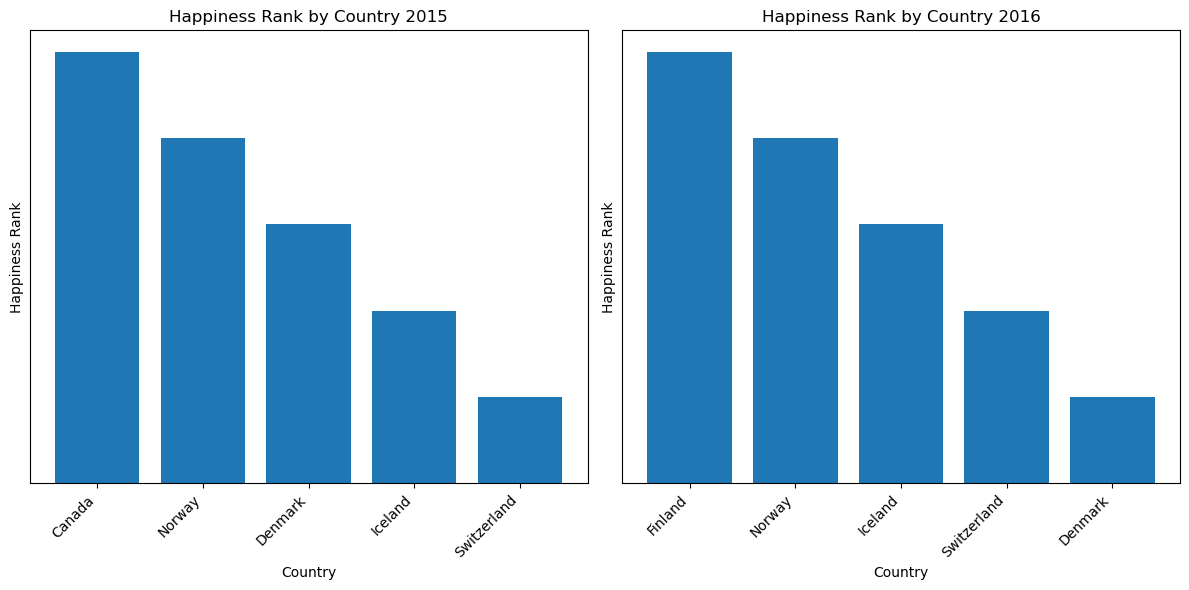

In [218]:
num_years = len(years)

fig, axes = plt.subplots(nrows=1, ncols=num_years, figsize=(num_years * 6, 6), sharey=True)

# Iterate over each dataframe and corresponding year
for ax, df, year in zip(axes, dataframes, years):
    top_5 = df.head(5).iloc[::-1]
    
    ax.bar(top_5['Country'], top_5['Happiness Rank'])
    
    ax.set_xlabel('Country')
    ax.set_ylabel('Happiness Rank')
    ax.set_title(f'Happiness Rank by Country {year}')
    ax.set_xticks(top_5['Country'])
    ax.set_xticklabels(top_5['Country'], rotation=45, ha='right')
    ax.set_yticks([])
    
    
    
    
plt.tight_layout()
plt.show()


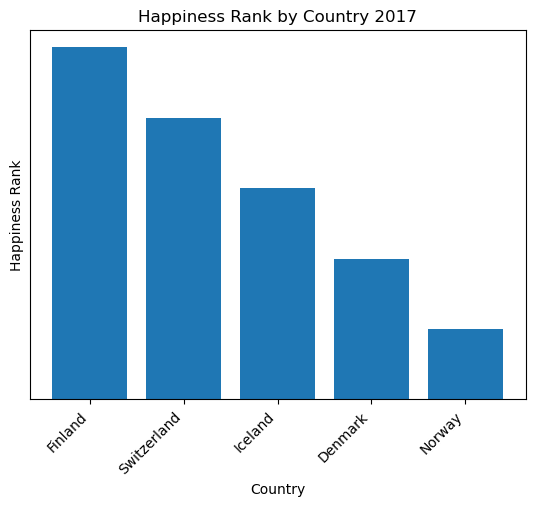

In [224]:
top_5 = happines_2017.head(5).iloc[::-1]



plt.figure()  
plt.bar(top_5['Country'], top_5['Happiness.Rank'])

plt.xlabel('Country')
plt.ylabel('Happiness Rank')
plt.title(f'Happiness Rank by Country 2017')

plt.xticks(rotation=45, ha='right')
plt.yticks([])


plt.show()

In [180]:
dataframes = [happines_2018, happines_2019]

years = ['2018', '2019']


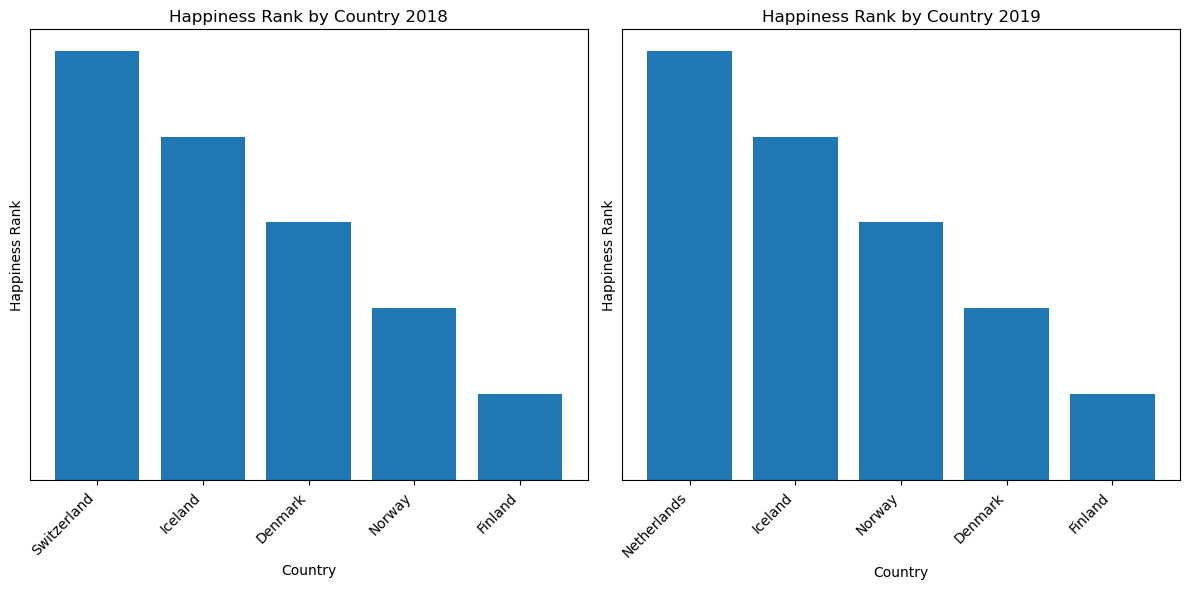

In [210]:
num_years = len(years)

fig, axes = plt.subplots(nrows=1, ncols=num_years, figsize=(num_years * 6, 6), sharey=True)

# Iterate over each dataframe and corresponding year
for ax, df, year in zip(axes, dataframes, years):
    top_5 = df.head(5).iloc[::-1]
    
    ax.bar(top_5['Country or region'], top_5['Overall rank'])
    
    ax.set_xlabel('Country')
    ax.set_ylabel('Happiness Rank')
    ax.set_title(f'Happiness Rank by Country {year}')
    ax.set_xticks(top_5['Country or region'])
    ax.set_xticklabels(top_5['Country or region'], rotation=45, ha='right')
    ax.set_yticks([])
    
    
    
    
plt.tight_layout()
plt.show()


In [196]:
columns = ['Economy (GDP per Capita)',
           'Family',
           'Health (Life Expectancy)',
           'Freedom',
           'Trust (Government Corruption)',
          'Generosity']

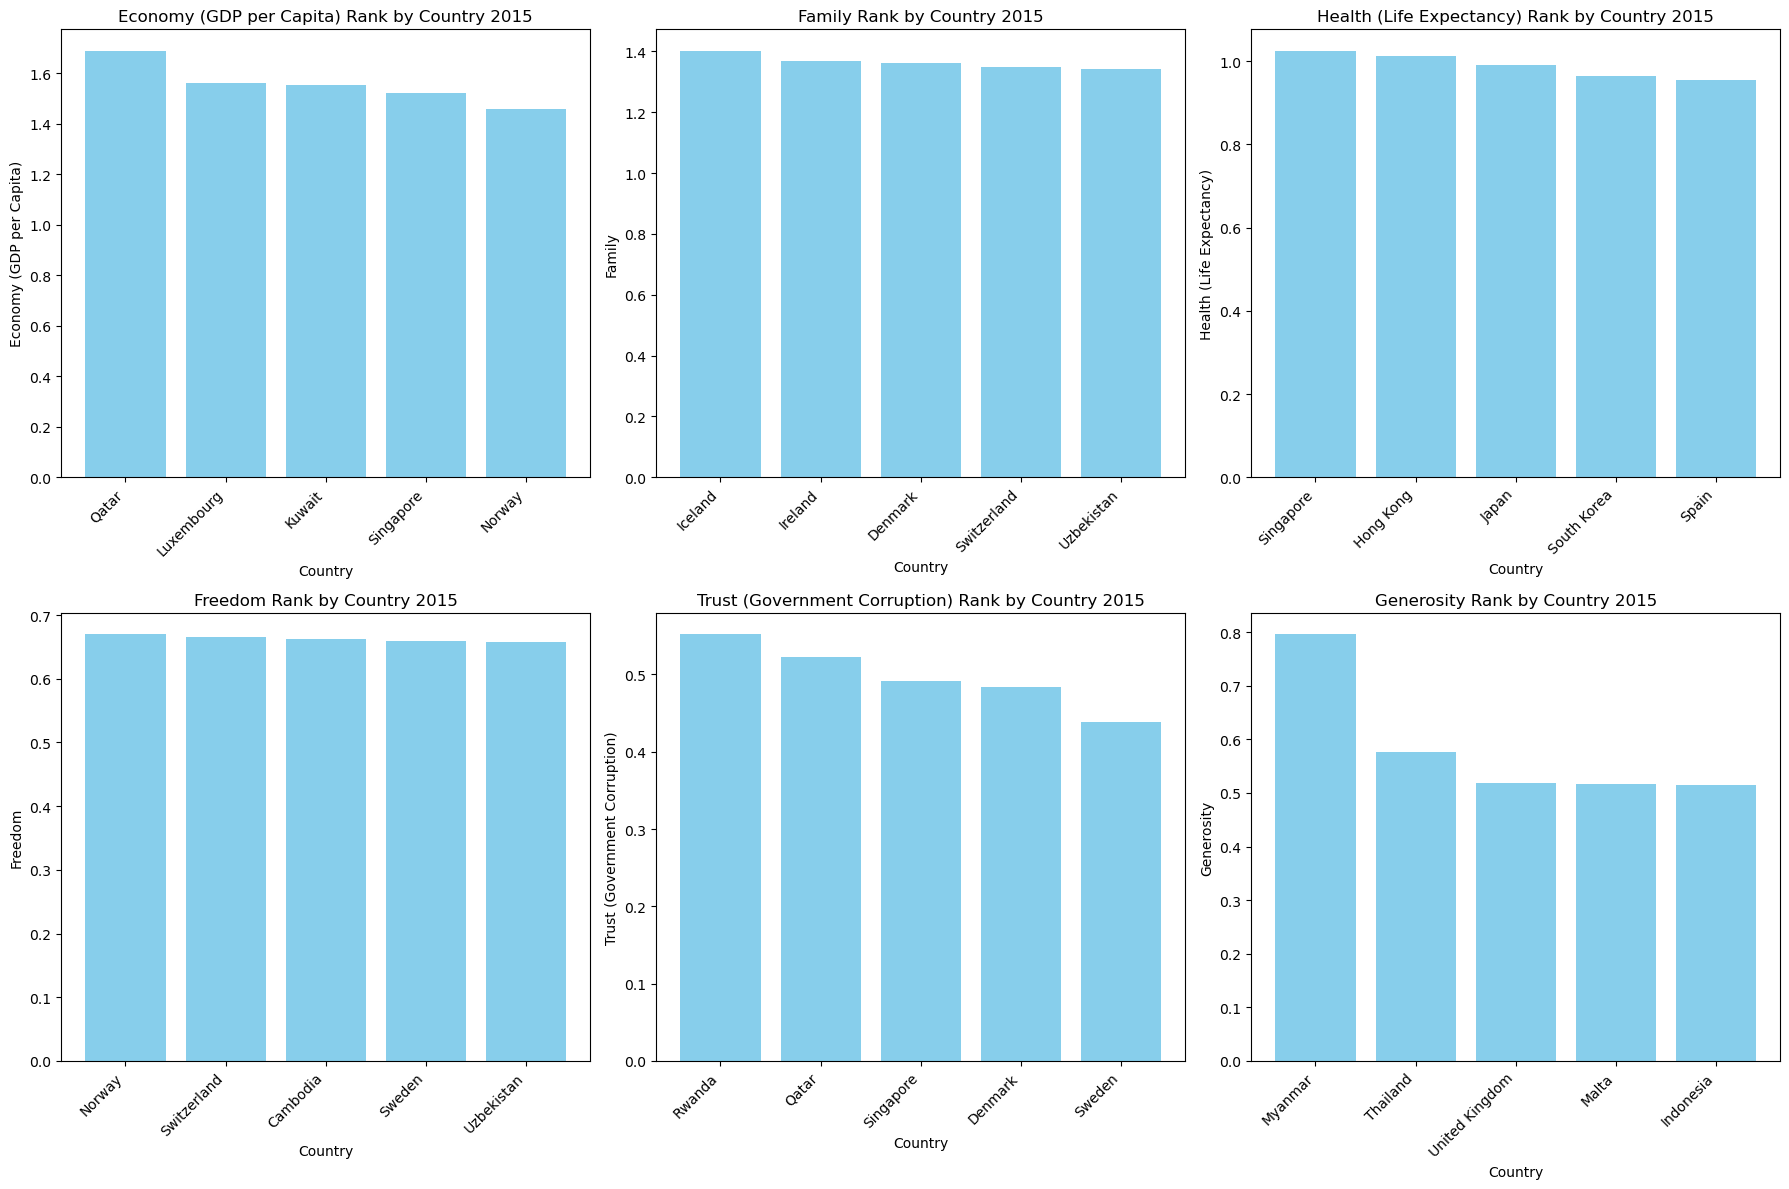

In [228]:
num_columns = len(columns)
num_rows = (num_columns + 2) // 3

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, num_rows * 6))

axes = axes.flatten()

for i, column in enumerate(columns):
    df_sorted = happines_2015.sort_values(by=column, ascending=False)
    top_5 = df_sorted.head(5)
    
    axes[i].bar(top_5['Country'], top_5[column], color='skyblue')
    axes[i].set_xlabel('Country')
    axes[i].set_ylabel(column)
    axes[i].set_title(f'{column} Rank by Country 2015')
    axes[i].set_xticks(range(len(top_5['Country'])))
    axes[i].set_xticklabels(top_5['Country'], rotation=45, ha='right')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

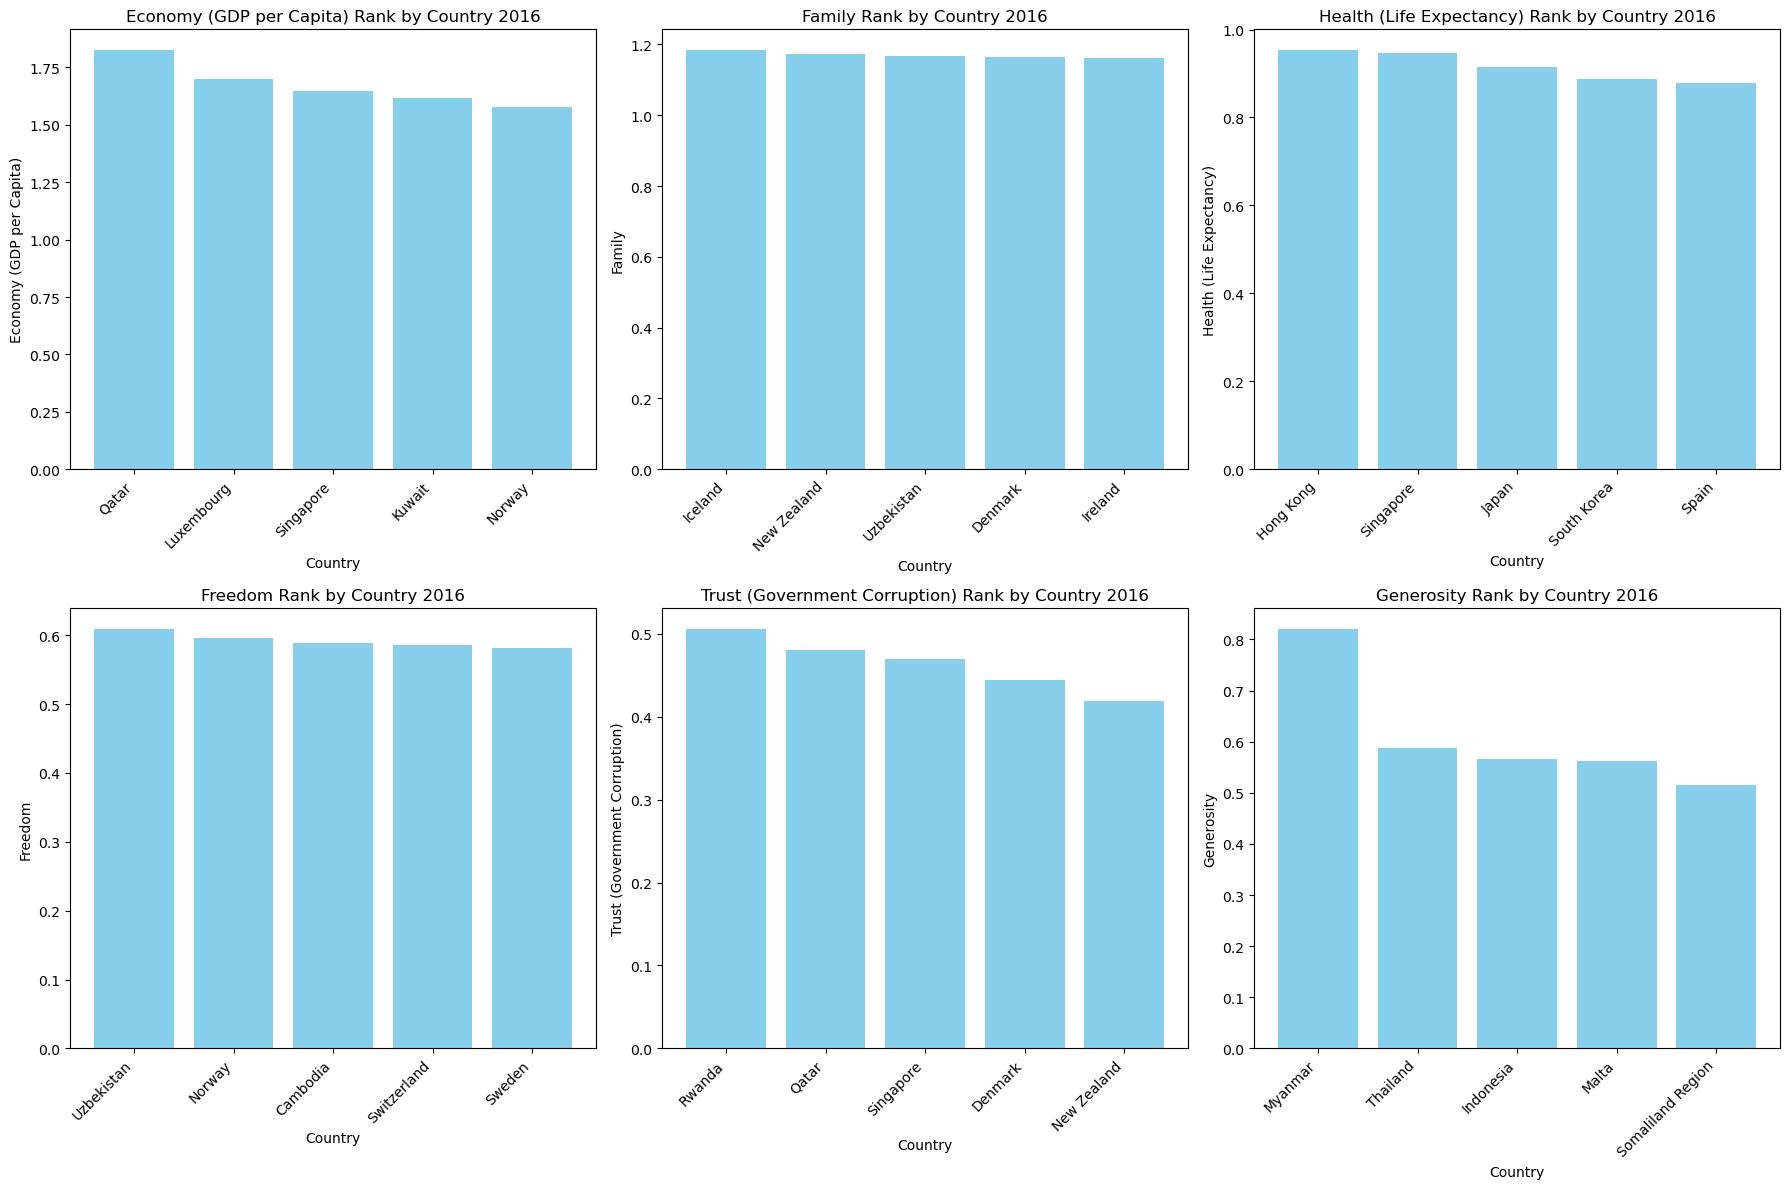

In [232]:
num_columns = len(columns)
num_rows = (num_columns + 2) // 3

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, num_rows * 6))

axes = axes.flatten()

for i, column in enumerate(columns):
    df_sorted = happines_2016.sort_values(by=column, ascending=False)
    top_5 = df_sorted.head(5)
    
    axes[i].bar(top_5['Country'], top_5[column], color='skyblue')
    axes[i].set_xlabel('Country')
    axes[i].set_ylabel(column)
    axes[i].set_title(f'{column} Rank by Country 2016')
    axes[i].set_xticks(range(len(top_5['Country'])))
    axes[i].set_xticklabels(top_5['Country'], rotation=45, ha='right')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [234]:
columns = ['Economy..GDP.per.Capita.',         
'Family'          ,                 
'Health..Life.Expectancy.'    ,     
'Freedom'       ,                   
'Generosity'      ,                 
'Trust..Government.Corruption.'] 

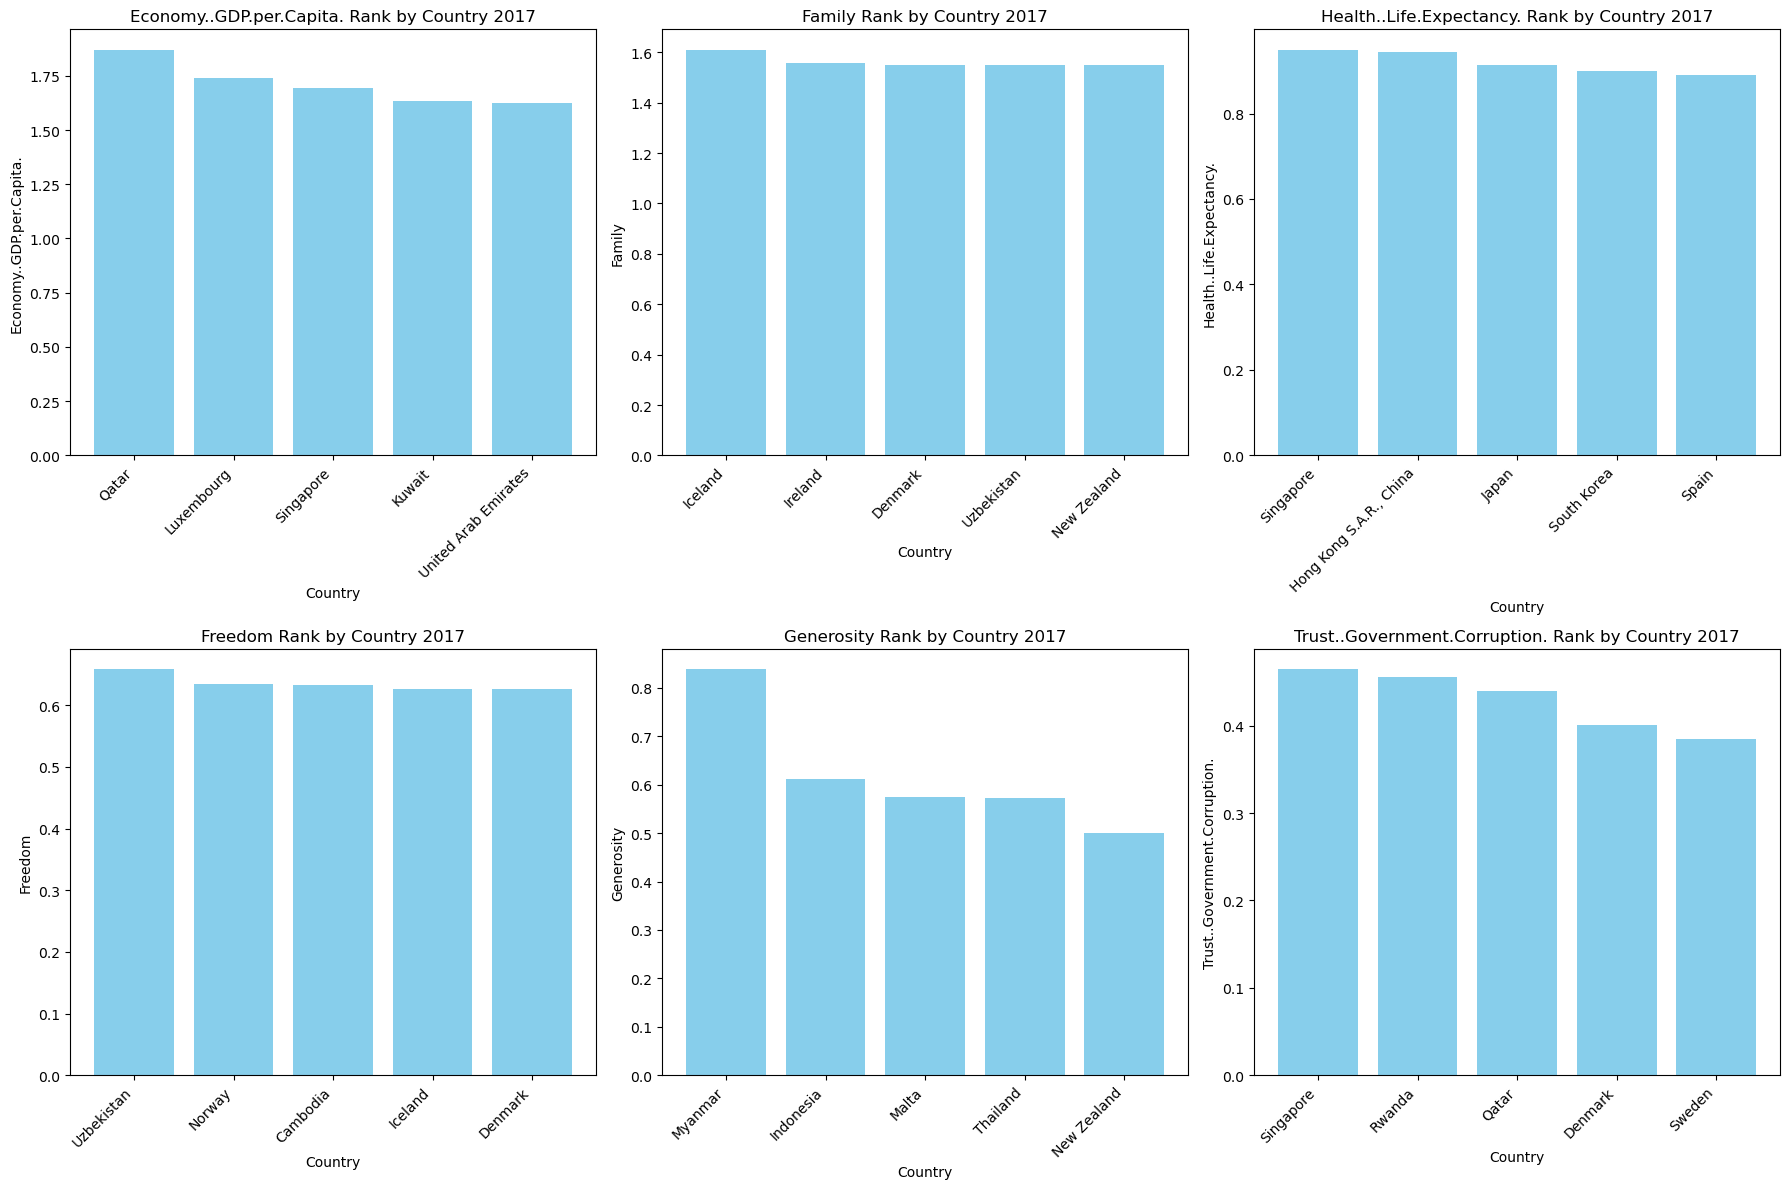

In [236]:
num_columns = len(columns)
num_rows = (num_columns + 2) // 3

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, num_rows * 6))

axes = axes.flatten()

for i, column in enumerate(columns):
    df_sorted = happines_2017.sort_values(by=column, ascending=False)
    top_5 = df_sorted.head(5)
    
    axes[i].bar(top_5['Country'], top_5[column], color='skyblue')
    axes[i].set_xlabel('Country')
    axes[i].set_ylabel(column)
    axes[i].set_title(f'{column} Rank by Country 2017')
    axes[i].set_xticks(range(len(top_5['Country'])))
    axes[i].set_xticklabels(top_5['Country'], rotation=45, ha='right')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [242]:
columns = ['GDP per capita',
'Social support',
'Healthy life expectancy',
'Freedom to make life choices',
'Generosity',
'Perceptions of corruption']

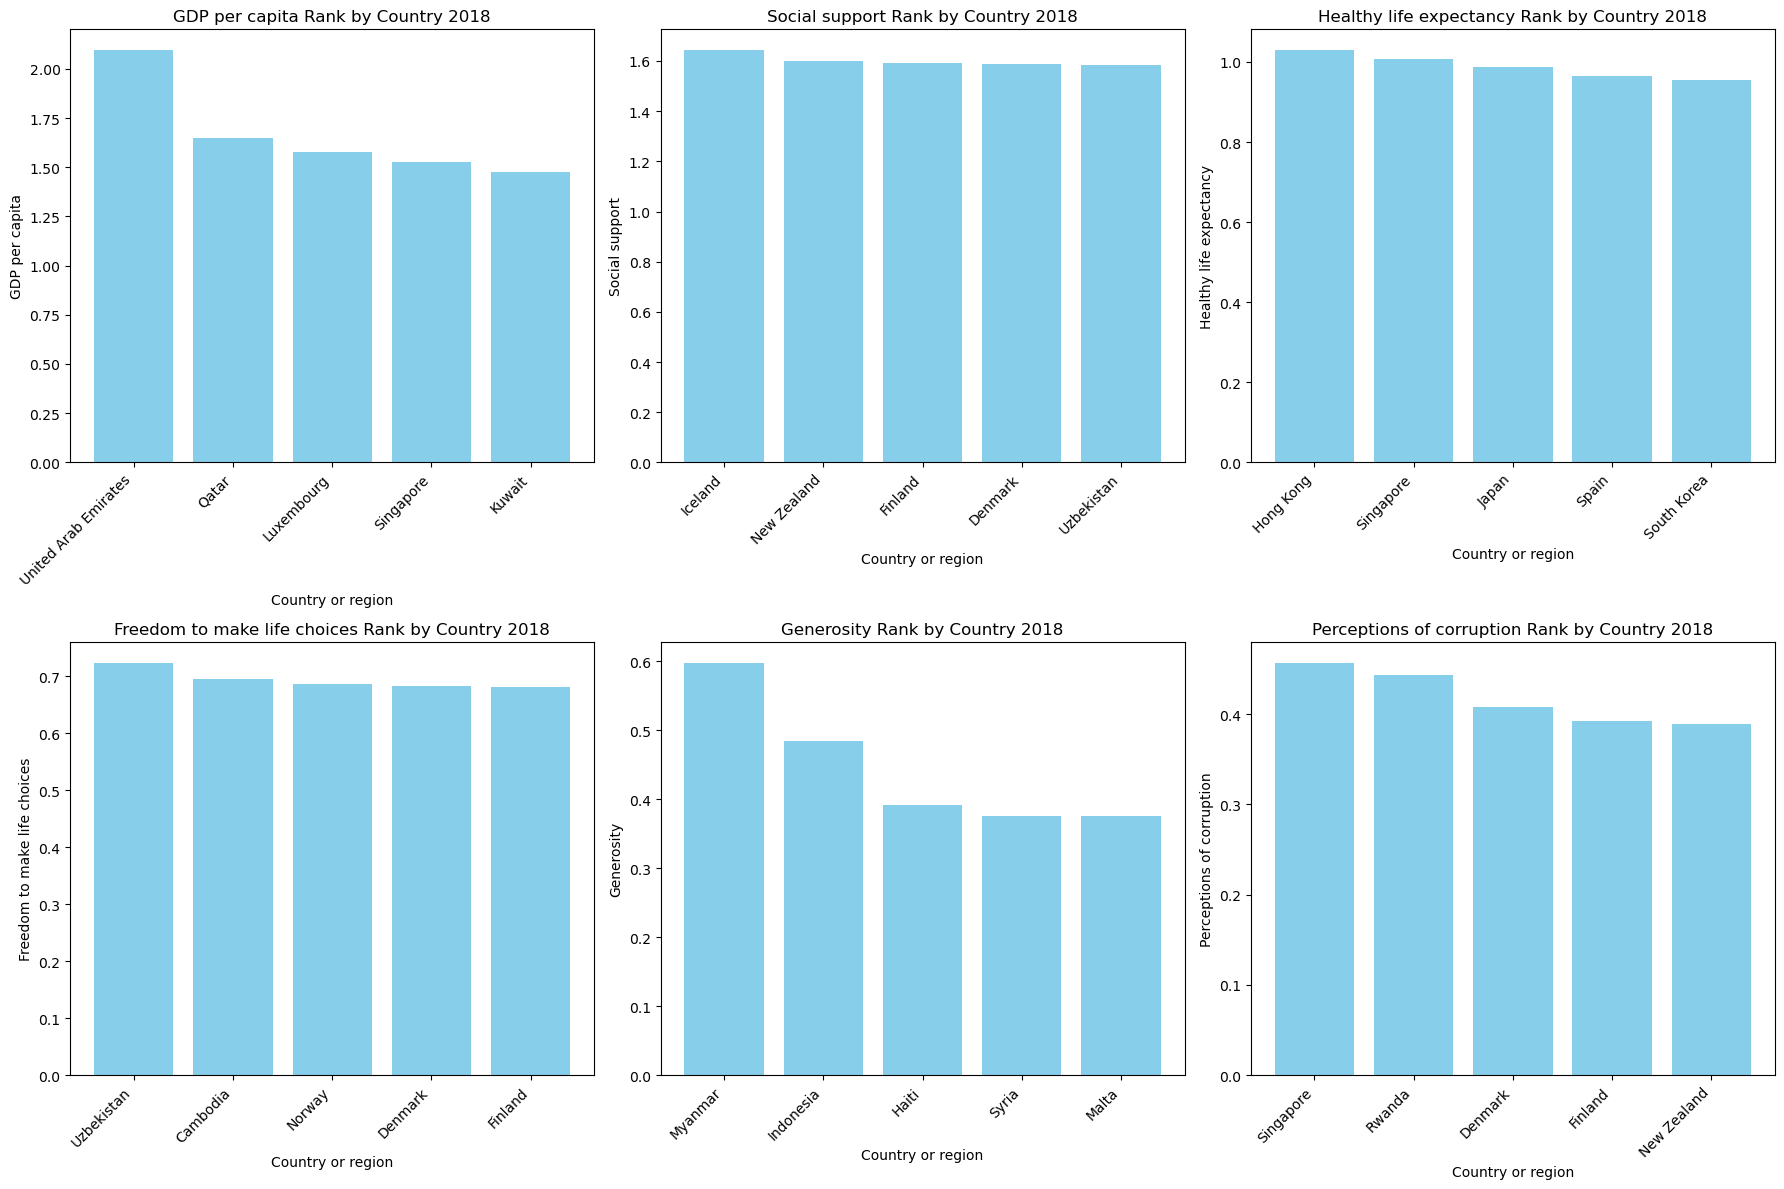

In [246]:
num_columns = len(columns)
num_rows = (num_columns + 2) // 3

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, num_rows * 6))

axes = axes.flatten()

for i, column in enumerate(columns):
    df_sorted = happines_2018.sort_values(by=column, ascending=False)
    top_5 = df_sorted.head(5)
    
    axes[i].bar(top_5['Country or region'], top_5[column], color='skyblue')
    axes[i].set_xlabel('Country or region')
    axes[i].set_ylabel(column)
    axes[i].set_title(f'{column} Rank by Country 2018')
    axes[i].set_xticks(range(len(top_5['Country or region'])))
    axes[i].set_xticklabels(top_5['Country or region'], rotation=45, ha='right')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

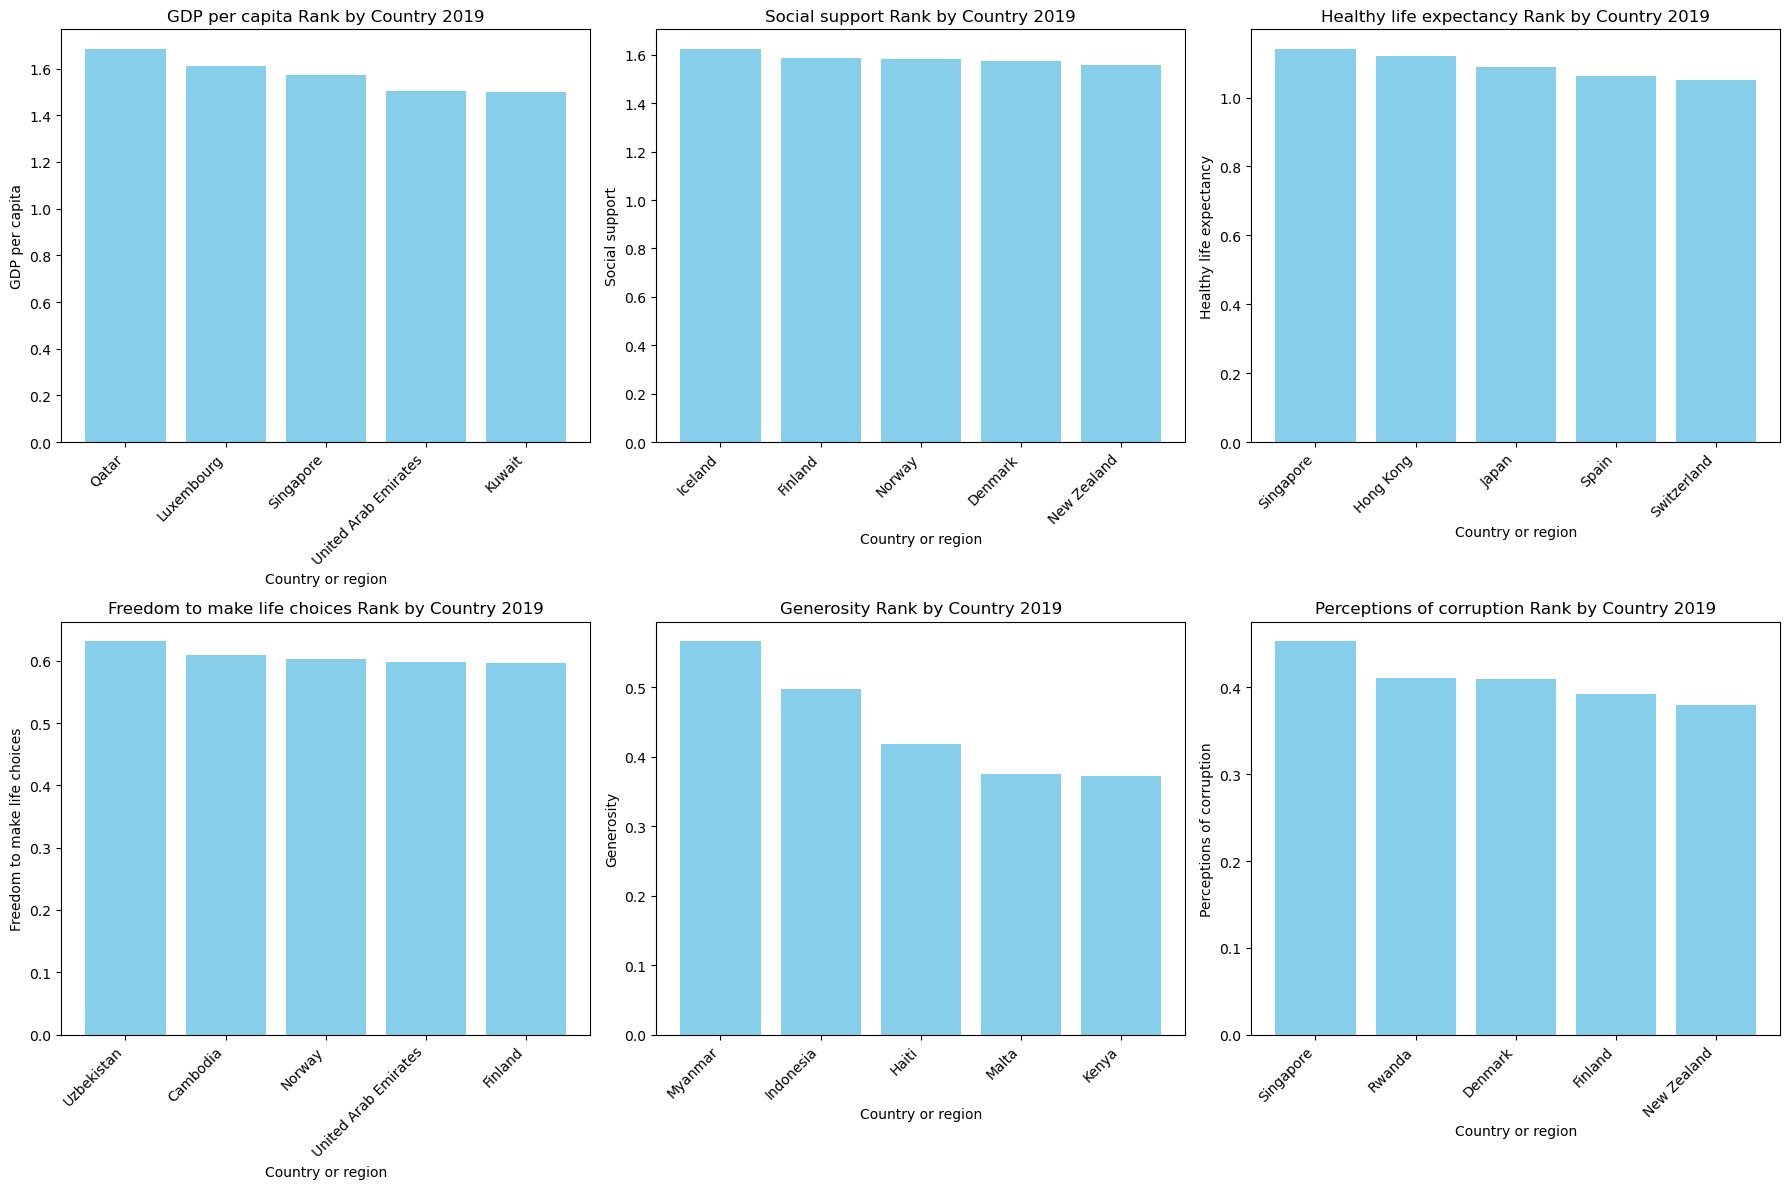

In [248]:
num_columns = len(columns)
num_rows = (num_columns + 2) // 3

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, num_rows * 6))

axes = axes.flatten()

for i, column in enumerate(columns):
    df_sorted = happines_2019.sort_values(by=column, ascending=False)
    top_5 = df_sorted.head(5)
    
    axes[i].bar(top_5['Country or region'], top_5[column], color='skyblue')
    axes[i].set_xlabel('Country or region')
    axes[i].set_ylabel(column)
    axes[i].set_title(f'{column} Rank by Country 2019')
    axes[i].set_xticks(range(len(top_5['Country or region'])))
    axes[i].set_xticklabels(top_5['Country or region'], rotation=45, ha='right')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [250]:
merged_df = pd.merge(happines_2015, happines_2016, on='Country', suffixes=('_df1', '_df2'))

merged_df['Rank_Difference'] = merged_df['Happiness Rank_df1'] - merged_df['Happiness Rank_df2']

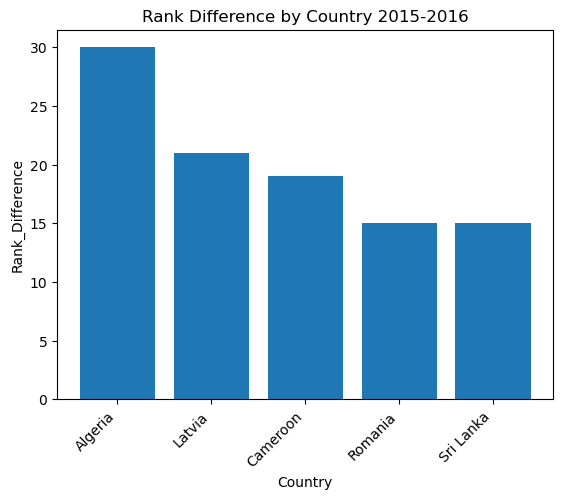

In [252]:
df_sorted = merged_df.sort_values(by='Rank_Difference', ascending=False)
top_5 = df_sorted.head(5)
plt.figure()  
plt.bar(top_5['Country'], top_5['Rank_Difference'])

plt.xlabel('Country')
plt.ylabel('Rank_Difference')
plt.title('Rank Difference by Country 2015-2016')
plt.xticks(rotation=45, ha='right')

plt.show()

In [254]:
happines_2017.rename(columns={
    'Happiness.Rank': 'Happiness Rank',
    'Happiness.Score': 'Happiness Score',
    'Whisker.high': 'Upper Confidence Interval',
    'Whisker.low': 'Lower Confidence Interval',
    'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
    'Health..Life.Expectancy.': 'Health (Life Expectancy)',
    'Trust..Government.Corruption.': 'Trust (Government Corruption)',
    'Dystopia.Residual': 'Dystopia Residual'
}, inplace=True)

merged_df = pd.merge(happines_2016, happines_2017, on='Country', suffixes=('_df1', '_df2'))

merged_df['Rank_Difference'] = merged_df['Happiness Rank_df1'] - merged_df['Happiness Rank_df2']


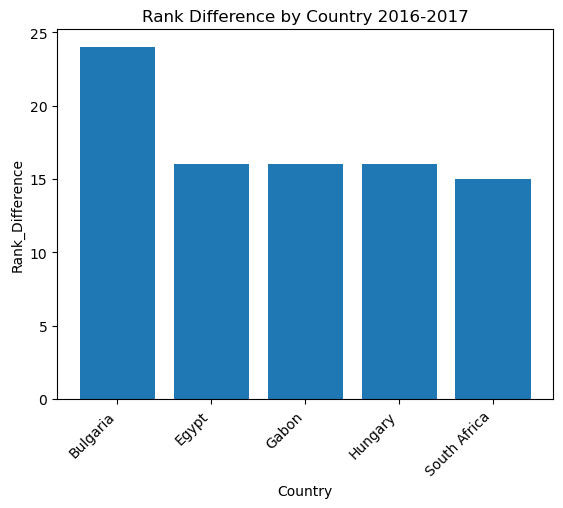

In [256]:
df_sorted = merged_df.sort_values(by='Rank_Difference', ascending=False)
top_5 = df_sorted.head(5)
plt.figure()  
plt.bar(top_5['Country'], top_5['Rank_Difference'])

plt.xlabel('Country')
plt.ylabel('Rank_Difference')
plt.title('Rank Difference by Country 2016-2017')
plt.xticks(rotation=45, ha='right')

plt.show()

In [258]:
merged_df = pd.merge(happines_2019, happines_2015, how='inner', left_on='Country or region', right_on='Country')
merged_df['Rank Difference'] = merged_df['Overall rank'] - merged_df['Happiness Rank']


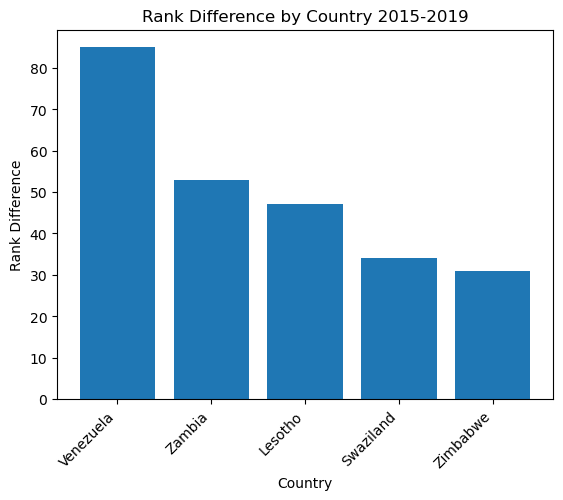

In [260]:
df_sorted = merged_df.sort_values(by='Rank Difference', ascending=False)
top_5 = df_sorted.head(5)
plt.figure()  
plt.bar(top_5['Country'], top_5['Rank Difference'])

plt.xlabel('Country')
plt.ylabel('Rank Difference')
plt.title('Rank Difference by Country 2015-2019')
plt.xticks(rotation=45, ha='right')

plt.show()